<a href="https://colab.research.google.com/github/maushamkumar/Pandas/blob/main/Multiindex_Series_and_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

Series is 1D object and dataFrame 2D object
fetch a value from a series we need only one piece of information which is the corresponding index.
fetch a value from a series we need only two piece of information which is corresponding index.


In [3]:
# can we have multiple indexes? Let's try
index_val = [('cse', 2019), ('cse', 202), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 202), ('ece', 2021), ('ece', 2022)]
a = pd.Series([1,2, 3, 4, 5, 6, 7, 8], index=index_val)
a

(cse, 2019)    1
(cse, 202)     2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 202)     6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [4]:
a[('cse', 2022)]

4

In [5]:
a[('ece', 2022)]

8

In [6]:
# The problem
a['cse']

KeyError: 'cse'

In [7]:
# This is not the right way to create a multi-index series.
# The solution -> MultiIndex series( also known as Hierarchical Indexing)
# multiple Index -> levels within a single index


In [8]:
# how to create multiindex index
# 1. pd.multiIndex from_tuple()
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

This is a multiindex object. This looks similar to the above code but the branch is treated in another way and the year is treated in another way.

In [9]:
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

In [10]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [11]:
# Another way to create multiindex
# pd.MultiIndex.from_product()
index_val = pd.MultiIndex.from_product([('cse', 'ece'), (2019, 2020, 2021, 2022)])
index_val

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

This code internally did cartesian product.

In [12]:
# level inside multiindex object

In [13]:
# Creating a series with multiindex object
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=multiindex)

In [14]:
# how to fetch items from such a series
s[('ece', 2019)]

5

In [15]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

what is the dimension of this series
Let's ask a question I want to fetch 4. To fetch 4 how many input I have to give.

In [16]:
s[('ece', 2022)]

8

So, why should I do that much work? Instead of this, we can use DataFrame which is absolutely right.

In [17]:
# logical question to ask


In [18]:
# unstack a series -> Convert a multiindex series into data frame
s.unstack()

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [19]:
# stack -> Convert a data frame into a multiindex series
s.unstack().stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

why do we need multiindex series if we can do the same work with dataframe.

-> Using series we convert a higher dimensions data into lower dimension data

-> that is the main reason we can convert 10D dataframe into lower dimension data (1D, 2D).

-> why should we do this => Because we know everything about Dataframe and series.

In [20]:
# MultiIndex dataframe


In [21]:
branch_df1 = pd.DataFrame(
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
        [9, 10],
        [11, 12],
        [13, 14],
        [15, 16],
    ],
    index = multiindex,
    columns = ['avg_package', 'students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [22]:
branch_df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [23]:
branch_df1.loc['ece']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [24]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [25]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [26]:
# multiindex df from columns peprspective
branch_df2 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0]

    ],
    index = [2019, 2020, 2021, 2022],
    columns = pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)
branch_df2


delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [27]:
branch_df2['delhi']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [28]:
branch_df2['delhi']['students']

2019    2
2020    4
2021    6
2022    8
Name: students, dtype: int64

In [29]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [30]:
 # multiindex df in terms of both columns and rows

branch_df3 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
        [9, 10, 0, 0],
        [11, 12, 0, 0],
        [13, 14, 0, 0],
        [15, 16, 0, 0]
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi', 'mumbai'],['avg_package', 'students']])
)
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

4D data. Represented using a 2D structure. That is data frame

## Stacking and Unstacking

In [31]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [32]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [33]:
branch_df1.unstack().unstack().unstack().unstack().unstack().unstack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [34]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [35]:
branch_df3.unstack()


delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [36]:
branch_df1.unstack().stack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [37]:
branch_df1.unstack().stack().stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [38]:
branch_df1.unstack().stack().stack().stack()

AttributeError: 'Series' object has no attribute 'stack'

In [39]:
# head and tail
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [40]:
branch_df3.tail()

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [43]:
# shape
branch_df3.shape

(8, 4)

In [44]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [46]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [48]:
# Extracting rows single
branch_df3.loc[('cse', 2021)]

delhi   avg_package    5
        students       6
mumbai  avg_package    0
        students       0
Name: (cse, 2021), dtype: int64

In [49]:
# Fetch multiple rows
# Let's first row, third row and fifth row
branch_df3.loc[('cse', 2019): ('ece', 2020)]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0

In [50]:
branch_df3.loc[('cse', 2019): ('ece', 2020): 2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [51]:
# using iloc
branch_df3.iloc[0]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: (cse, 2019), dtype: int64

In [54]:
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [53]:
branch_df3.iloc[1:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2020           3        4           0        0
    2022           7        8           0        0

In [55]:
# columns
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [56]:
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [58]:
# muliple column s
# let's say we want to fetch students of delhi and avg package of Mumbai
branch_df3[['delhi', 'mumbai']][['students', 'avg_package']]

KeyError: "['students' 'avg_package'] not in index"

In [59]:
branch_df3.iloc[:, 1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [61]:
# Extracting both
branch_df3.iloc[[0, 4], [1, 2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [63]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [68]:
# what if we want to sort brach as ascending order and year as descending
branch_df3.sort_index(ascending=[False, True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [71]:
# Let's we want to sort based on branch only
branch_df3.sort_index(level=1, ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [72]:
branch_df3.sort_index(level=0, ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [73]:
# Multiindex dataframe(col) -> transpose
branch_df3.T

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [74]:
# Swaplever1 => year will level 0 and branch will be level 1
branch_df3.swaplevel(0, 1)

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [75]:
branch_df3.swaplevel(0, 1, axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

## Long vs Wide data

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

* Wide has more no of column compared to row

**Long Format** is where, for each point we have many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

* Wide has more no of rows compared to column

But essentially both types of data give us the same information

Melt -> melt converts into wide data format into long data format.  
pivot -> melt converts into long data format into wide data format.  


In [76]:
# melt
pd.DataFrame({'cse' : [120]})

,cse
0,120


In [77]:
pd.DataFrame({'cse' : [120]}).melt()

,variable,value
0,cse,120


In [79]:
pd.DataFrame({'cse' : [120], 'ece': [100], 'mach':[50]})

,cse,ece,mach
0,120,100,50


In [80]:
pd.DataFrame({'cse' : [120], 'ece': [100], 'mach':[50]}).melt(var_name = 'branch', value_name = 'students')

,branch,students
0,cse,120
1,ece,100
2,mach,50


In [81]:
pd.DataFrame({
    'branch': ['cse', 'ece', 'mach'],
    '2020': [120, 100, 50],
    '2021': [130, 90, 45],
    '2022': [140, 110, 60]
})

,branch,2020,2021,2022
0,cse,120,130,140
1,ece,100,90,110
2,mach,50,45,60


In [83]:
pd.DataFrame({
    'branch': ['cse', 'ece', 'mach'],
    '2020': [120, 100, 50],
    '2021': [130, 90, 45],
    '2022': [140, 110, 60]
}).melt(id_vars = 'branch') # Using id_vars you can stop from becoming row

,branch,variable,value
0,cse,2020,120
1,ece,2020,100
2,mach,2020,50
3,cse,2021,130
4,ece,2021,90
5,mach,2021,45
6,cse,2022,140
7,ece,2022,110
8,mach,2022,60


In [84]:
covide = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [85]:
covide.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [86]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [87]:
covide.shape

(289, 1081)

In [88]:
confirm.shape

(289, 1081)

In [89]:
df = covide.copy()

In [101]:
df['Province/State'].isnull().sum()

In [102]:
df['Lat'].isnull().sum()

2

In [104]:
df.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)

In [94]:
df.rename(columns={'Country/Region': 'country'}, inplace=True)

In [110]:
df = df.melt(id_vars=['country'], var_name='date', value_name='deaths')

In [95]:
data = confirm.copy()

In [96]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [97]:
data.drop(columns=['Province/State', 'Lat', 'Long' ], inplace=True)
data.rename(columns={'Country/Region': 'country'}, inplace=True)

In [98]:
data.head()

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,Albania,0,0,0,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,Algeria,0,0,0,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,Andorra,0,0,0,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,Angola,0,0,0,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [111]:
data = data.melt(id_vars=['country'], var_name='date', value_name='confirmed')

In [114]:
mk = df.merge(data, on=['country', 'date'], how='inner')

In [116]:
mk.to_csv('Covid.csv', index=False)

## Pivot Table
The pivot table takes simple column-wise data as input and groups the entires into a two-dimensional table that provides a multidimensional summarization of the data.

In [117]:
import seaborn as sns

In [118]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Generally we use Piot Table on categorical column

In [119]:
# Average customer bill based on gender
df.groupby('sex').total_bill.mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [121]:
# Average customer bill based on gender and he/she is a smoker or not
df.groupby(['sex', 'smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [122]:
df.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [123]:
df.pivot_table(index='sex', columns='smoker', values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [125]:
df.pivot_table(index='sex', columns='smoker', values='tip')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [126]:
# pivot table default aggregate function is mean
# aggfunc parameter can be used to specify different aggregation function
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [127]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [130]:
# pd.select_numeric(df).pivot_table(index='sex', columns='smoker')

AttributeError: module 'pandas' has no attribute 'select_numeric'

In [131]:
# Multidimensional
df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values='total_bill') # This is a five-dimensional data frame

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [132]:
# margins
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum', margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [135]:
# plotting graphs
data = pd.read_csv('/content/expense_data.csv')

In [139]:
data.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [141]:
type(data)

pandas.core.frame.DataFrame

In [143]:
data['Category'].value_counts(

)

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [148]:
data['date'] = pd.to_datetime(data['Date'])

In [153]:
data['month'] = data['date'].dt.month_name()

<Axes: xlabel='month'>

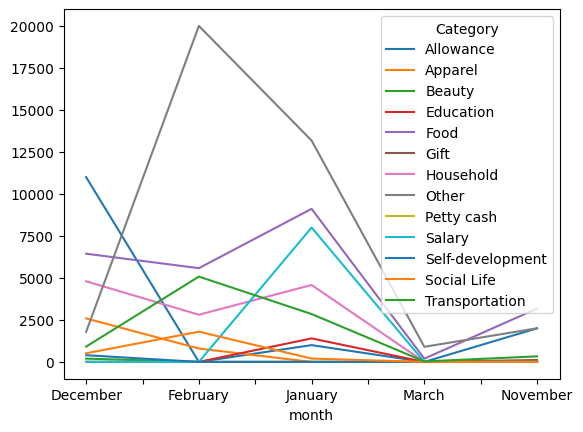

In [156]:
data.pivot_table(index='month', columns='Category', values = 'INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='month'>

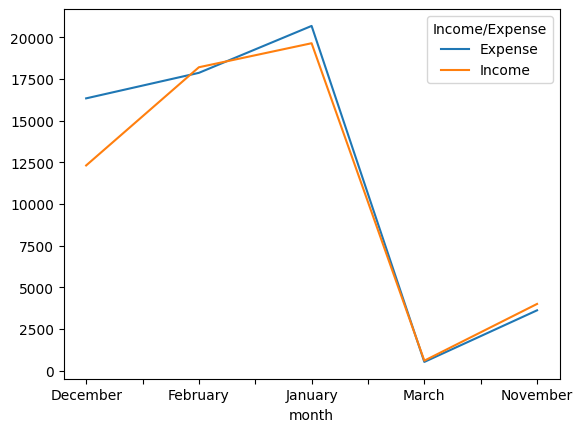

In [157]:
data.pivot_table(index='month', columns='Income/Expense', values = 'INR', aggfunc='sum', fill_value=0).plot()